In [2]:
import json
import os
import random
import cv2 # 这是OpenCV库
import matplotlib.pyplot as plt

# 设置matplotlib在notebook中正确显示图片
%matplotlib inline

In [7]:
# 数据集的根目录
bdd_root = '../data/BDD100K_Images' # 假设bdd100k文件夹在data目录下

# 训练图片的文件夹路径
image_dir = os.path.join(bdd_root, 'train','images')

# 训练标签的文件路径
label_path = os.path.join(bdd_root, 'train','annotations','bdd100k_labels_images_train.json')

print(f"图片文件夹路径: {image_dir}")
print(f"标签文件路径: {label_path}")

图片文件夹路径: ../data/BDD100K_Images\train\images
标签文件路径: ../data/BDD100K_Images\train\annotations\bdd100k_labels_images_train.json


单元格 3：加载并解析JSON标签文件
BDD100K的标签是一个巨大的JSON文件，里面是一个列表，列表的每个元素都描述了一张图片。
单元格 4：将标签数据转换为更高效的格式
为了方便查找，我们把列表格式的标签，转换成一个以“图片名”为key，“标签列表”为value的字典。


In [ ]:
# 增强版单元格：智能加载或处理数据

import pickle
import ijson
from tqdm import tqdm
import os
import json

# --- 路径定义 ---
# 我们需要一个新路径来存放处理好的文件
bdd_root = '../data/bdd100BDD100K_Images/'
label_path = os.path.join(bdd_root, 'train', 'annotations', 'bdd100k_labes_images.json')
# 新增：定义处理后文件的保存路径
pickle_path = os.path.join(bdd_root, 'train', 'annotations', 'image_to_labels.pkl') 
# --------------------------------

# --- 智能加载逻辑 ---
if os.path.exists(pickle_path):
    # 如果处理好的文件已存在，直接加载，速度飞快
    print(f"发现已处理好的标签文件，正在从 '{pickle_path}' 直接加载...")
    with open(pickle_path, 'rb') as f:
        image_to_labels = pickle.load(f)
    print("快速加载成功！")

else:
    # 如果文件不存在，才执行慢速的解析流程
    print(f"未发现已处理好的文件。正在从原始JSON文件 '{label_path}' 解析，请稍候...")
    image_to_labels = {}
    with open(label_path, 'r') as f:
        parser = ijson.items(f, 'item')
        for item in tqdm(parser, total=70000):
            image_to_labels[item['name']] = item['labels']
    
    # 将这次处理的结果保存下来，方便下次使用
    print(f"\n解析完成！正在将结果保存到 '{pickle_path}' 以便下次快速加载...")
    with open(pickle_path, 'wb') as f:
        pickle.dump(image_to_labels, f)
    print("保存成功！")

print(f"\n最终处理了 {len(image_to_labels)} 张图片的标注。")

正在使用流式解析器加载标签文件，这可能需要几分钟，请耐心等待...


100%|█████████▉| 69863/70000 [14:25<00:01, 80.75it/s]  


标签文件加载和解析成功！总共处理了 69863 张图片的标注。

已成功为图片 '0000f77c-6257be58.jpg' 创建索引。


单元格 5：编写可视化函数 (核心)
这个函数将完成我们今天的核心目标：在一张图片上把它的所有标注框都画出来。

In [15]:
def visualize_image(image_name, image_dir, labels_dict):
    """读取一张图片，并在上面画出所有的【目标检测】边界框"""
    # 1. 读取图片
    image_path = os.path.join(image_dir, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # 2. 获取这张图片的所有标签
    labels = labels_dict.get(image_name, [])
    
    # 3. 遍历所有标签
    for label in labels:
        # --- 关键修正：在尝试读取'box2d'之前，先检查它是否存在 ---
        if 'box2d' in label:
            # 只有当这个标签里有'box2d'时，我们才执行下面的画图操作
            category = label['category']
            box = label['box2d']
            x1, y1, x2, y2 = int(box['x1']), int(box['y1']), int(box['x2']), int(box['y2'])
            
            # 用OpenCV画一个绿色的方框
            cv2.rectangle(image, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
            
            # 在方框上方写上类别名
            cv2.putText(image, category, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        # --- 修正结束 ---
        
    # 4. 用matplotlib显示最终的图片
    plt.figure(figsize=(15, 10))
    plt.imshow(image)
    plt.title(f"Image: {image_name}")
    plt.axis('off')
    plt.show()

print("修正后的可视化函数已定义！")

修正后的可视化函数已定义！


单元格 6：随机抽查一张图片进行可视化！

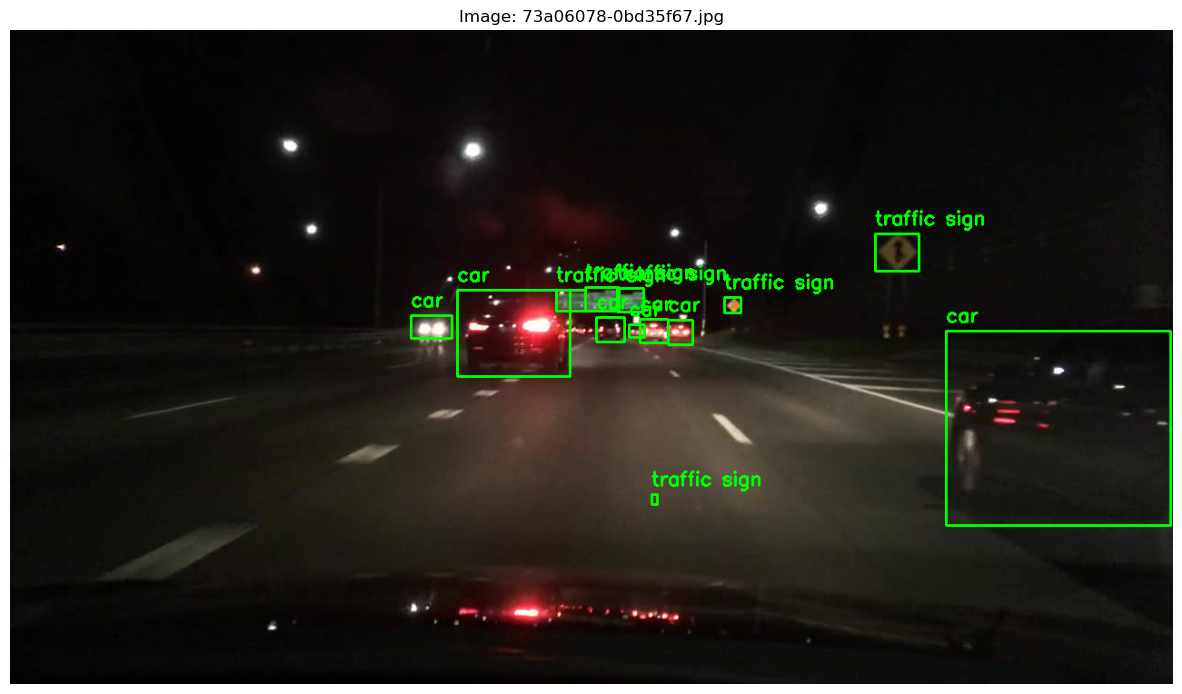

In [16]:
# 获取所有有标注的图片的文件名
all_image_names = list(image_to_labels.keys())

# 随机选择一张
random_image_name = random.choice(all_image_names)

# 调用我们的函数来显示它！
visualize_image(random_image_name, image_dir, image_to_labels)